# **BT thực hành 7.1: Confidence Interval và Levels**


> Cập nhật: **07/2023**



In [1]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = '/content/gdrive/My Drive/Colab Notebooks/LDS3/Thuc hanh/Ch7_Inferential_Statistics'

Mounted at /content/gdrive


In [2]:
## Thư viện
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sbn
import scipy.stats       as st
import warnings
warnings.filterwarnings('ignore')

---
## **Yêu cầu 1:**
1. Tính SEM của mẫu số liệu có kích thước là 45 và độ lệch chuẩn là 38.
2. Tính SEM của mẫu số liệu {14, 8, 11, 12, 16, 10}.
3. Tính SEM của mẫu số liệu điểm IQ: {96, 104, 126, 134, 140}.
---

In [3]:
## 1. Tính SEM của MẪU số liệu có kích thước là 45 và độ lệch chuẩn là 38.
std = 38
n   = 45
SEM = std / (n ** 0.5)
SEM

5.664705542999467

In [4]:
## 2. Tính SEM của MẪU số liệu {14, 8, 11, 12, 16, 10}.
## https://numpy.org/doc/stable/reference/generated/numpy.std.html
##    Hàm numpy.std() có tham số ddof (DELTA degrees of freedom)
##    ==> mẫu số dof = (N -  ddof)
##           Quần thể: ddof = 0 (default)
##           Mẫu     : ddof = 1
data = np.array([14, 8, 11, 12, 16, 10])

## Trường hợp MẪU dữ liệu
std  = np.std(data, ddof = 1)
print('SEM (sample)     =', std / (data.size ** 0.5))

## Trường hợp QUẦN THỂ
std  = np.std(data, ddof = 0) ## default
print('SEM (population) =', std / (data.size ** 0.5))

SEM (sample)     = 1.166666666666667
SEM (population) = 1.065016084037823


In [5]:
## Sử dụng hàm scipy.stats.sem()
print('SEM (sample)     =', st.sem(data, ddof = 1)) # ddof = 1 (default !)
print('SEM (population) =', st.sem(data, ddof = 0))

SEM (sample)     = 1.166666666666667
SEM (population) = 1.065016084037823


In [6]:
## 3. Tính SEM của MẪU số liệu điểm IQ: {96, 104, 126, 134, 140}.
IQ  = np.array([96, 104, 126, 134, 140])
std = np.std(IQ, ddof = 1)

std / (IQ.size ** .5), st.sem(IQ) # default ddof = 1

(8.555699854482976, 8.555699854482976)

---
## **Yêu cầu 2:**
> Lấy mẫu ngẫu nhiên 40 người đàn ông và có được chiều cao trung bình là 175cm với độ lệch chuẩn (quần thể) là 20cm. Xác định khoảng tin cậy tương ứng với mức độ tin cậy 95%.
---

In [7]:
## Tạo mẫu dữ liệu giả lập cho 40 người
mu  = 175
std = 20
n   = 40
while True:
    heights = np.random.normal(mu, std, n)
    if abs(mu - np.mean(heights)) < 0.01: # mẫu DL có độ lệch nhỏ
        break
print(heights)

[157.94923977 194.06042033 180.81076289 205.54464299 170.30823804
 150.50033875 153.70777532 191.69142625 210.86482411 174.38102067
 158.2057907  189.65207203 196.85091763 190.07252875 170.95937128
 170.61744977 197.4271312  180.280157   177.13876686 203.85654159
 140.71813229 138.65115708 160.12655195 144.09750222 165.34334087
 169.09088611 194.6757141  199.06779302 186.7143969  186.28362702
 144.87573046 165.41902838 194.25137707 167.32221722 170.21461589
 194.01223244 164.25684802 204.7451644  159.05627822 126.50454571]


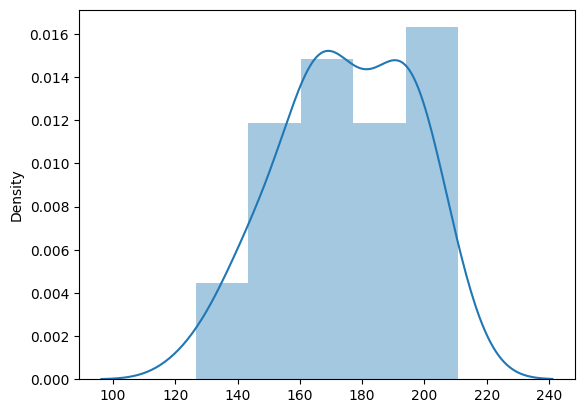

In [8]:
## Biểu diễn trực quan dữ liệu
sbn.distplot(heights, kde = True)
plt.show()

In [10]:
## Hàm tính khoảng tin cậy theo phân phối Z
def confidence_interval_Z(data, confidence_level):
    n    = len(data)
    mean = data.mean()
    std  = data.std(ddof = 0)

    r    = (st.norm.ppf((1 + confidence_level) / 2)) * (std / (n ** 0.5))
    return np.array([mean - r, mean + r])

In [11]:
## Xác định khoảng tin cậy
confidence_level = 0.95
CI               = confidence_interval_Z(heights, confidence_level)
print(f'Ước lượng điểm: {heights.mean():.2f}')
print(f'Khoảng tin cậy: [{(CI[0]):.2f}, {(CI[1]):.2f}] (với alpha = {1 - confidence_level:.2f})')

Ước lượng điểm: 175.01
Khoảng tin cậy: [168.56, 181.46] (với alpha = 0.05)


---
## **Yêu cầu 3:**
> Lấy mẫu ngẫu nhiên 100 cây giống có chiều cao trung bình là 7.5 inch và độ lệch chuẩn (MẪU) là 2.3 inch. Xác định khoảng tin cậy tương ứng với mức độ tin cậy 95%. Vẽ biểu đồ histogram.
---

In [12]:
## Tạo mẫu ngẫu nhiên theo đề bài
mu  = 7.5
std = 2.3
n   = 100
heights = np.random.normal(mu, std, n)

print(heights[:10])

[10.56228724 10.25404075 11.62890011  6.23080201  9.82312437  5.66230914
 11.06835494  2.68286759  6.42094494  6.62577448]


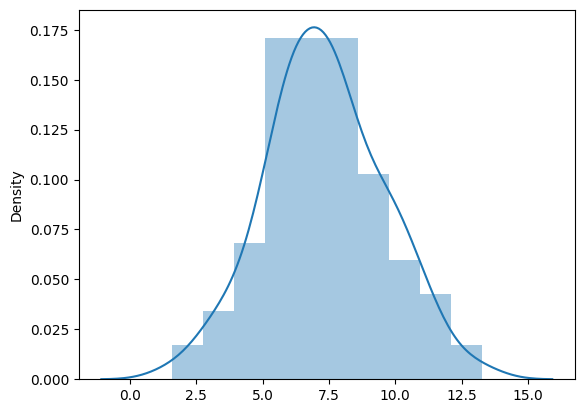

In [13]:
## Biểu diễn trực quan dữ liệu
sbn.distplot(heights, kde = True)
plt.show()

In [14]:
## Hàm tính khoảng tin cậy theo phân phối T
def confidence_interval_T(data, confidence_level):
    n    = len(data)
    mean = data.mean()
    r    = st.t.ppf((1 + confidence_level) / 2, n - 1) * st.sem(data, ddof = 1)

    return np.array([mean - r, mean + r])

In [15]:
## Xác định khoảng tin cậy
confidence_level = 0.95
CI               = confidence_interval_T(heights, confidence_level)
print(f'Ước lượng điểm: {data.mean():.2f}')
print(f'Khoảng tin cậy: [{(CI[0]):.2f}, {(CI[1]):.2f}] (với alpha = {1 - confidence_level:.2f})')

Ước lượng điểm: 11.83
Khoảng tin cậy: [6.90, 7.78] (với alpha = 0.05)


In [16]:
## Sử dụng hàm st.t.interval()
CI = st.t.interval(confidence = confidence_level, df = 99, loc = np.mean(heights), scale = st.sem(heights))
print(f'Khoảng tin cậy: [{(CI[0]):.2f}, {(CI[1]):.2f}] (với alpha = {1 - confidence_level:.2f})')

Khoảng tin cậy: [6.90, 7.78] (với alpha = 0.05)


---
## **Yêu cầu 4:**
Tập tin Normtemp.txt chứa dữ liệu về thân nhiệt, giới tính và nhịp tim của 130 người (nguồn: Journal of Statistics Education, Shoemaker 1996). Xem xét cột dữ liệu đầu tiên (Temperature). Xác định khoảng tin cậy tương ứng với mức độ tin cậy 95%.

---

In [17]:
## Đọc tập tin dữ liệu
data = pd.read_csv(folder + "/Data/Normtemp.txt", header = None, sep = ' ')

In [18]:
## Lấy cột dữ liệu đầu tiên (Temperature)
tempt = data[0]
tempt.head()

0    96.3
1    96.7
2    96.9
3    97.0
4    97.1
Name: 0, dtype: float64

In [19]:
## Ước lượng điểm, ước lượng khoảng
confidence_level = 0.95
CI               = confidence_interval_Z(tempt, confidence_level)
print(f'Ước lượng điểm: {tempt.mean():.2f}')
print(f'Khoảng tin cậy: [{(CI[0]):.2f}, {(CI[1]):.2f}] (với alpha = {1 - confidence_level:.2f})')

Ước lượng điểm: 98.25
Khoảng tin cậy: [98.12, 98.37] (với alpha = 0.05)


In [20]:
## Sử dụng hàm st.norm.interval()
CI = st.norm.interval(confidence = confidence_level, loc = np.mean(tempt), scale = st.sem(tempt))
print(f'Khoảng tin cậy: [{(CI[0]):.2f}, {(CI[1]):.2f}] (với alpha = {1 - confidence_level:.2f})')

Khoảng tin cậy: [98.12, 98.38] (với alpha = 0.05)
